# 🔍 Finding the SIFT keypoints and descriptors

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Let's first create our SIFT features extractor

In [46]:
sift = cv.SIFT_create()

<h4>Loading images in RGB Colorspace</h4>

In [64]:
train_img = cv.imread('../images/train.jpg')
query_img = cv.imread('../images/query.jpg')

<h4>Changing input image in 8-bit grayscale image</h4>

In [66]:
gray_train = cv.cvtColor(train_img,cv.COLOR_BGR2GRAY)
gray_query = cv.cvtColor(query_img,cv.COLOR_BGR2GRAY)

<Figure size 3600x3600 with 0 Axes>

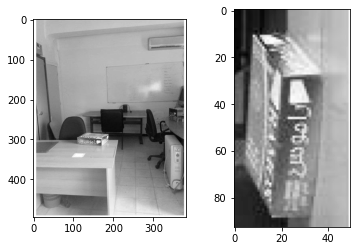

In [73]:
plt.figure(figsize=(50,50))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_train,cmap='gray')
ax2.imshow(gray_query,cmap='gray')

<h4>Detects keypoints and computes their descriptors</h4>

In [69]:
kp_train, desc_train = sift.detectAndCompute(gray_train, None)
kp_query, desc_query = sift.detectAndCompute(gray_query, None)

In [71]:
desc_train.shape

(362, 128)

<h4>Drawing the keypoints onto the images</h4>

In [ ]:
result_query = cv.drawKeypoints(gray_query, kp_query, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result_train = cv.drawKeypoints(gray_train, kp_train, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)